# Visualizing nested sampling results

Code adapted from [this tutorial](https://dynesty.readthedocs.io/en/stable/quickstart.html#visualizing-results).

In [4]:
import os
from dynesty import plotting as dyplot
from inference.sampling import NestedStrategy
%matplotlib inline

In [5]:
# Change path to output file
dirname = os.getcwd()
filename  = '../output.pickle'
filepath = os.path.join(dirname, filename)
save_figures = False
figures_prefix = 'figures/nested_sampling/'

In [6]:
results = NestedStrategy.read_from_file(filename)
results.summary()

Summary
niter: 10418
ncall: 48316
eff(%): 20.274
logz: -1534.484 +/-  0.097


## Trace plots

In [9]:
# Change labels to appropriate names
ndim = results.samples.shape[-1]
labels = [r'H_0', r'\alpha', r'\beta', r'c']
plot_labels = [r'$' + label + r'$' for label in labels[:ndim]]

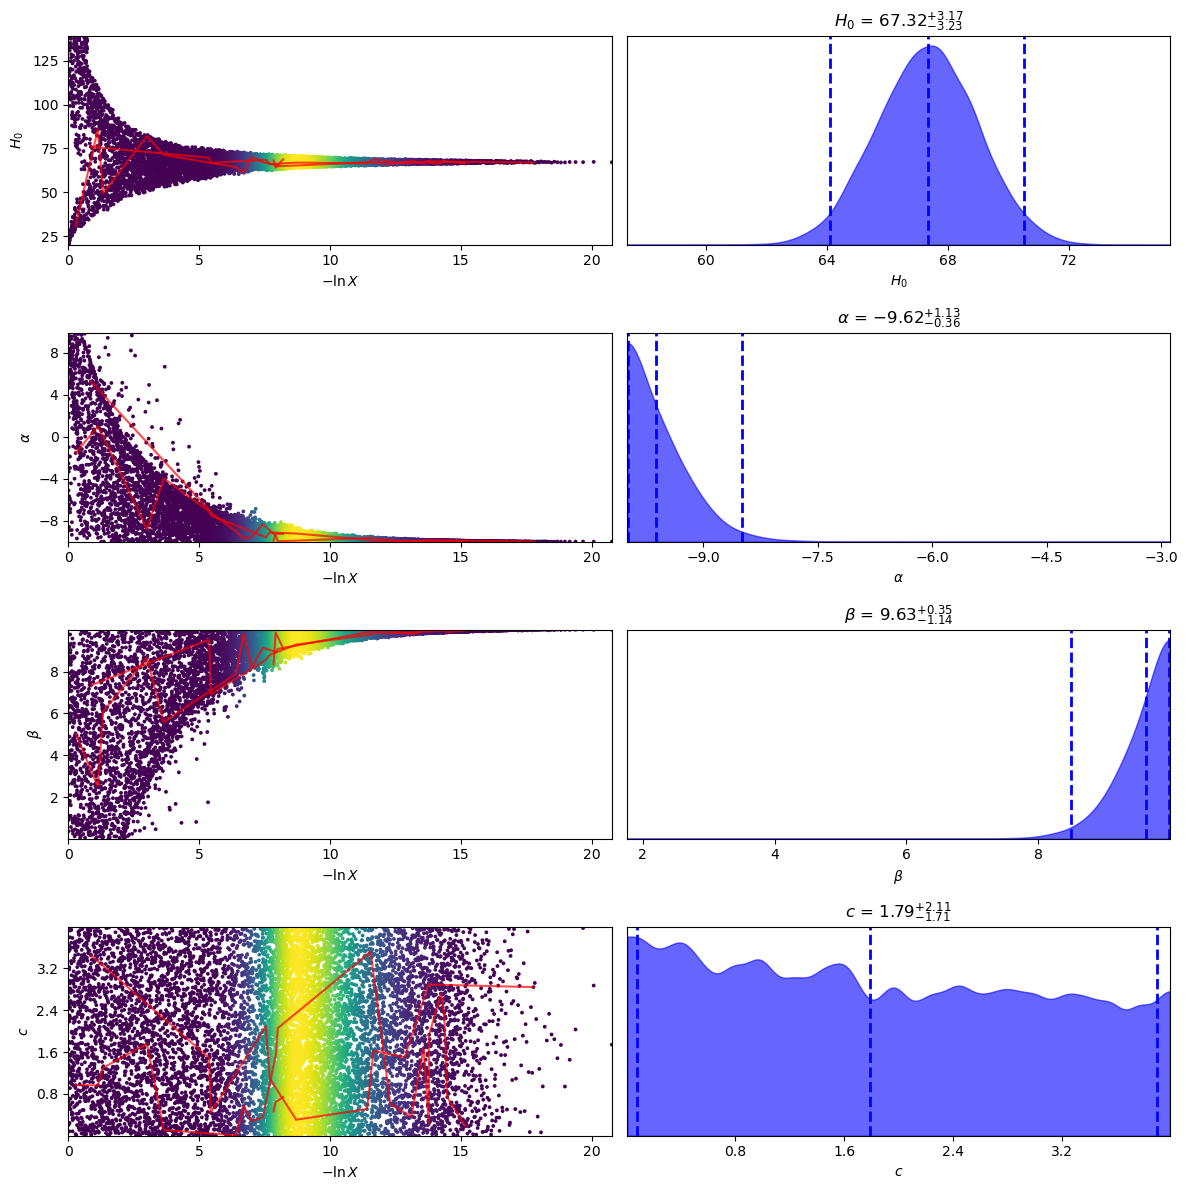

In [26]:
fig, ax = dyplot.traceplot(results, labels=plot_labels,
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True)
fig.tight_layout()

## Corner plots

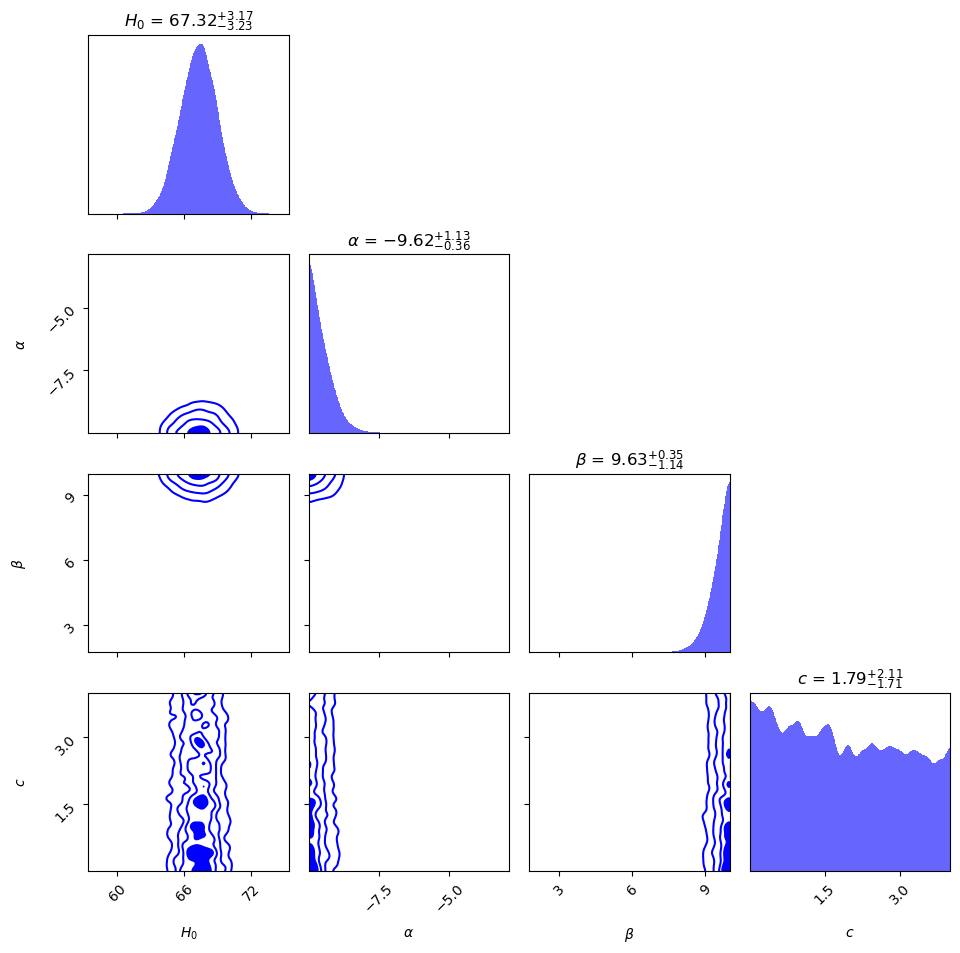

In [27]:
fig, axs = dyplot.cornerplot(results, color='blue',
                           truth_color='black', show_titles=True,
                           max_n_ticks=3, quantiles=None, labels=plot_labels)
fig.tight_layout()